# Data Visualizations - State GDP and Covid-19 Related Deaths

In [131]:
#import things

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.stats as sts
from scipy.stats import linregress 
import gmaps

from config import g_key

In [132]:
#read csv file
df = pd.read_csv('Complete.csv')

df.head()

,State,2018:Q1,2018:Q2,2018:Q3,2018:Q4,Total GDP,Date,Number of Deaths,Pop2018,Region
0,Alabama,217369.7,220572.2,223140.7,225859.4,886942.0,20200917,2401,4887870,East South Central
1,Alaska,53563.0,54372.7,55410.0,55590.6,218936.3,20200917,44,737438,Pacific
2,Arizona,340672.6,345474.0,351708.8,355332.9,1393188.3,20200917,5409,7171650,Mountain
3,Arkansas,126088.8,128352.5,129032.8,130201.5,513675.6,20200917,1166,3013820,West South Central
4,California,2928096.5,2992622.8,3017340.5,3052871.3,11990931.1,20200917,14721,39557000,Pacific


In [133]:
#find out the types in each list 
df.dtypes

State                object
2018:Q1             float64
2018:Q2             float64
2018:Q3             float64
2018:Q4             float64
Total GDP           float64
Date                  int64
Number of Deaths      int64
Pop2018               int64
Region               object
dtype: object

(0, 30000)

<Figure size 720x432 with 0 Axes>

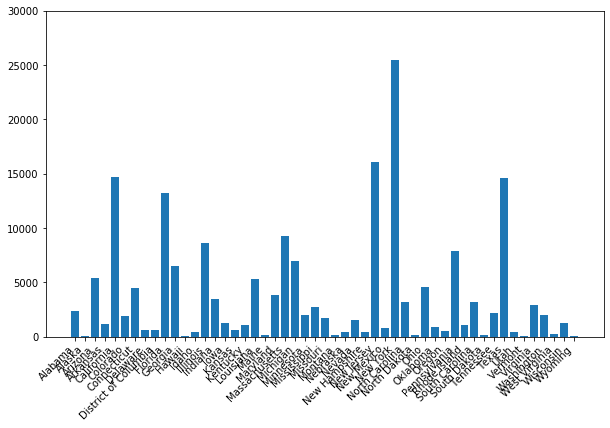

In [148]:
#create bar for number of deaths per state 



x_axis = np.arange(len(df['State']))

plt.figure(figsize=(10,6))

plt.figure(figsize=(10,6))
plt.bar(x=df['State'], height=df['Number of Deaths'], alpha=1, align='center', width=.8)
plt.xticks(x_axis, df['State'], rotation=45, ha='right')

plt.ylim(0, 30000)


#not sure why it looks like a dwarf plotted this, but this is really not my problem, just wanted to test it out

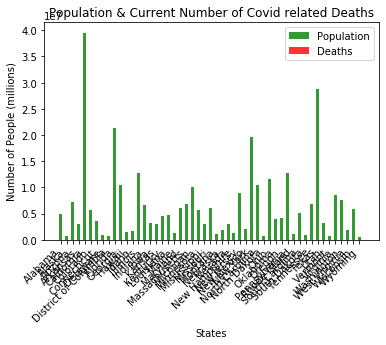

In [5]:
#compare two data sets, GDP & deaths per state
n_groups = (len(df['State']))
pop_data = df['Pop2018']
ded_data = df['Number of Deaths']

# print(n_groups)
# print(gdp_data)
# print(ded_data)

#create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = .50
opacity = .8

pop_bar = plt.bar(index, pop_data, bar_width, alpha = opacity,
                 color='green',
                 label='Population')

ded_bar = plt.bar(index + bar_width, ded_data, bar_width, alpha = opacity,
                 color='red',
                 label='Deaths')

plt.xlabel('States')
plt.title('Population & Current Number of Covid related Deaths')
plt.ylabel('Number of People (millions)')
plt.xticks(index, df['State'], rotation=45, ha='right')
plt.legend()

#the dwarf has struck again

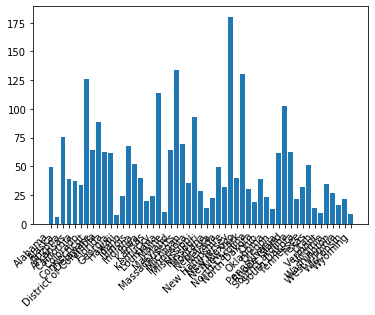

<Figure size 7200x3600 with 0 Axes>

In [6]:
#compare the number of deaths per population of state 
per_capita = df['Number of Deaths'] / df['Pop2018']*100000

per_capita

#plot bar 
plt.bar(x=df['State'], height=per_capita, alpha=1, align='center', width=.8)

x_axis = np.arange(len(df['State']))


plt.xticks(x_axis, df['State'], rotation=45, ha='right')
plt.figure(figsize=(100,50))

plt.subplots_adjust(bottom=0.15)

#the dwarf has struck again

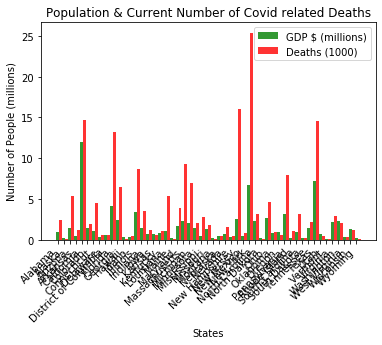

In [7]:
#create a comparison bar chart for GDP & deaths - is there a relationship 
#between how much the GDP is and the number of deaths?

gdp_data = df['Total GDP']/1000000
# gdp_data.max()
# print(gdp_data)

ded_data = df['Number of Deaths']/1000
# print(ded_data)

#create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = .50
opacity = .8

gdp_bar = plt.bar(index, gdp_data, bar_width, alpha = opacity,
                 color='green',
                 label='GDP $ (millions)')

ded_bar = plt.bar(index + bar_width, ded_data, bar_width, alpha = opacity,
                 color='red',
                 label='Deaths (1000)')

plt.xlabel('States')
plt.title('Population & Current Number of Covid related Deaths')
plt.ylabel('Number of People (millions)')
plt.xticks(index, df['State'], rotation=45, ha='right')
plt.legend()

#i give up on this plotting 

Text(0, 0.5, 'Number of Deaths')

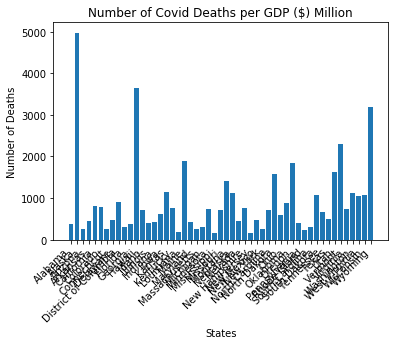

In [8]:
#divide the GDP per the number of deaths 

ded_mil = df['Total GDP']/df['Number of Deaths']

# ded_mil.max()

#plot data 
x_axis = np.arange(len(df['State']))


plt.xticks(x_axis, df['State'], rotation=45, ha='right')

plt.bar(x=x_axis, height=ded_mil, alpha=1, align='center', width=.8)

plt.title('Number of Covid Deaths per GDP ($) Million')
plt.xlabel('States')
plt.ylabel('Number of Deaths')


0     6.675465
1     2.488011
2    11.990931
3     7.210045
4     4.156946
5     2.277952
6     3.461242
7     3.132671
8     2.108383
9     2.368613
Name: Total GDP, dtype: float64
0    25.413
1    16.057
2    14.721
3    14.590
4    13.247
5     9.260
6     8.624
7     7.913
8     6.955
9     6.474
Name: Number of Deaths, dtype: float64


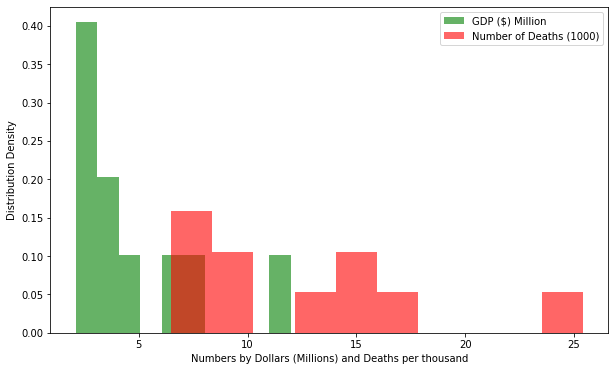

In [47]:
#plot histograms - how the data is skewed on GDP & covid deaths based on the top 10 states 

# sort data by the num of deaths
sort = df.sort_values(['Number of Deaths'], ascending=False)

#get only the top 10
sorted_df = sort.head(10).reset_index()

sorted_df

#plot
plt.figure(figsize=(10,6))

#divide GDP by the million to make the numbers not too large
gdp_dt = sorted_df['Total GDP']/1000000
print(gdp_dt)

#divide death by 1000 to make the numbers on the same scale as GDP numbers 
ded_dt = sorted_df['Number of Deaths']/1000
print(ded_dt)

#plot overlapping histograms
plt.hist(gdp_dt, density=True, color='green', alpha=0.6, label='GDP ($) Million')
plt.hist(ded_dt, density=True, color='red', alpha=0.6, label='Number of Deaths (1000)')
plt.ylabel('Distribution Density')
plt.xlabel('Numbers by Dollars (Millions) and Deaths per thousand')
plt.legend()


In [10]:
#import gmaps
gmaps.configure(api_key=g_key)

In [77]:
#print dataframe 
df

#realized i do not have the lat/lngs for each state, downloaded a CSV file found on kaggle
f_path = os.path.join('Resources', 'statelatlong.csv')

#read csv
coord_df = pd.read_csv(f_path)

coord_df 

# #clean up by removing columns 
new_cor = coord_df.drop(columns='State').rename(columns={'City': 'State'})

new_cor

df
# merge data to add coordinates 
coords = df.merge(new_cor, on='State', how='left')

coords



,State,2018:Q1,2018:Q2,2018:Q3,2018:Q4,Total GDP,Date,Number of Deaths,Pop2018,Region,max rank,Latitude,Longitude
0,Alabama,217369.7,220572.2,223140.7,225859.4,886942.0,20200917,2401,4887870,East South Central,21.0,32.601011,-86.680736
1,Alaska,53563.0,54372.7,55410.0,55590.6,218936.3,20200917,44,737438,Pacific,51.0,61.302501,-158.775020
2,Arizona,340672.6,345474.0,351708.8,355332.9,1393188.3,20200917,5409,7171650,Mountain,11.0,34.168219,-111.930907
3,Arkansas,126088.8,128352.5,129032.8,130201.5,513675.6,20200917,1166,3013820,West South Central,30.0,34.751928,-92.131378
4,California,2928096.5,2992622.8,3017340.5,3052871.3,11990931.1,20200917,14721,39557000,Pacific,3.0,37.271875,-119.270415
5,Colorado,362721.2,370476.6,375311.6,378488.8,1486998.2,20200917,1905,5695560,Mountain,25.0,38.997934,-105.550567
6,Connecticut,272854.5,273884.5,278294.5,277874.1,1102907.6,20200917,4488,3572660,New England,14.0,41.518784,-72.757507
7,Delaware,72091.2,73024.7,74461.4,74348.1,293925.4,20200917,619,967171,South Atlantic,35.5,39.145251,-75.418921
8,District of Columbia,138469.2,139579.6,141968.8,142626.2,562643.8,20200917,619,702455,South Atlantic,35.5,38.899349,-77.014567
9,Florida,1020176.9,1032277.4,1048477.6,1056013.7,4156945.6,20200917,13247,21299300,South Atlantic,5.0,27.975728,-83.833017


In [82]:
#set locations for gmaps
locations = coords[['Latitude', 'Longitude']]
locations.dtypes
# print(locations)

#set weight 
# ded = coords['Number of Deaths']
# gdp = coords['Total GDP']

# ded.max()
# gdp.min()

Latitude     float64
Longitude    float64
dtype: object

In [83]:
#add layer for covid related deaths
fig = gmaps.figure()

ded_layer = gmaps.heatmap_layer(locations, weights=ded,
                               dissipating=False, max_intensity=1000,
                               point_radius=.9)
gdp_layer = gmaps.heatmap_layer(locations, weights=gdp,
                               dissipating=True, max_intensity=100000,
                               point_radius=15)

fig.add_layer(gdp_layer)
fig.add_layer(ded_layer)

fig

#add layer for GDP data 

Figure(layout=FigureLayout(height='420px'))

In [111]:
#summary stats 
US_mean = coords['Number of Deaths'].mean()
US_med = coords['Number of Deaths'].median()
US_var = coords['Number of Deaths'].var()
US_stdev = coords['Number of Deaths'].std()
US_sem = coords['Number of Deaths'].sem()

US_stats = pd.DataFrame({'Mean': [US_mean],
                        'Median': [US_med],
                        'Variance': [US_var],
                        'SD': [US_stdev],
                        'SEM': [US_sem]})
# statframe = US_mean, 
# US_stats = pd.DataFrame([US_med])
sum_stat = US_stats.rename(index={'0': 'US Deaths'})

sum_stat

,Mean,Median,Variance,SD,SEM
0,3706.372549,1757.0,2.642643e+07,5140.664011,719.836943


25413
51
51


Text(25000, 5000000, 'y = 329.27x + 384576.24')

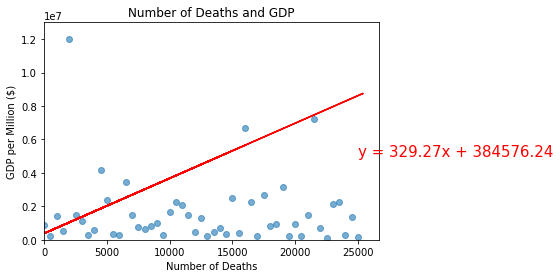

In [125]:
# x_limit = df['Total GDP'].max()
# print(x_limit)
# x_axis = np.arange(0, x_limit, 100)
x_limit = df['Number of Deaths'].max()
print(x_limit)
x_axis = np.arange(0, x_limit, 500)

print(len(x_axis))

data = df['Total GDP']

print(len(data))
plt.scatter(x=x_axis, y=data, alpha=0.6)

plt.ylim(0, 13000000)
plt.xlim(0, x_limit*1.05)
plt.title('Number of Deaths in relation to state GDP')
plt.xlabel('Number of Deaths')
plt.ylabel('GDP $ (millions)')

#linear regression 

gdp = df['Total GDP']
ded = df['Number of Deaths']

# Run the regression and store each of the returned values
(slope, intercept, rvalue, pvalue, stderr) = linregress(ded, gdp)

# Calculate the predictions for each value of x (blood pressure)
regress_values = ded * slope + intercept

# Create the linear equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the regression line
plt.xlabel('Number of Deaths')
plt.ylabel('GDP per Million ($)')
plt.title('Number of Deaths and GDP')

plt.plot(ded, regress_values, "red")

# Add the linear equation to the plot
plt.annotate(line_eq, (25000, 5000000), fontsize=15, color="red")


In [116]:
# Calculate the correlation coefficient and linear regression model 
# for number of deaths & GDP

gdp = df['Total GDP']
ded = df['Number of Deaths']

#get the variables from the last practice and use them here 
correlation = sts.pearsonr(ded, gdp)

print(f"The correlation coefficient (r) is {round(correlation[0],2)}")
print(f"The p-value is {correlation[1]}")

The correlation coefficient (r) is 0.81
The p-value is 6.388969457599579e-13


Text(0, 0.5, 'GDP $ (millions)')

<Figure size 7200x4320 with 0 Axes>

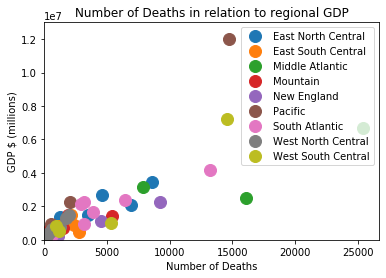

In [158]:
#see if there's any relation to region GDP and deaths 
regions = df.groupby('Region')

plt.figure(figsize=(100,60))
fig, ax = plt.subplots()
ax.margins(0.05)
for state, region in regions:
    plt.plot(region["Number of Deaths"], region["Total GDP"], marker="o", linestyle="", ms=12, label=state)
ax.legend()


plt.ylim(0, 13000000)
plt.xlim(0, x_limit*1.05)
plt.title('Number of Deaths in relation to regional GDP')
plt.xlabel('Number of Deaths')
plt.ylabel('GDP $ (millions)')

# #add linear regression and r values 
# #linear regression 

# gdp_group = regions['Total GDP']
# ded_group = regions['Number of Deaths']

# # Run the regression and store each of the returned values
# (slope, intercept, rvalue, pvalue, stderr) = linregress(ded_group, gdp_group)

# # Calculate the predictions for each value of x (blood pressure)
# regress_values = ded * slope + intercept

# # Create the linear equation
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# # Plot the regression line
# plt.xlabel('Number of Deaths')
# plt.ylabel('GDP per Million ($)')
# plt.title('Number of Deaths and GDP')

# plt.plot(ded, regress_values, "red")

# # Add the linear equation to the plot
# plt.annotate(line_eq, (25000, 5000000), fontsize=15, color="red")